/Users/Florian/Documents/INI/F1TENTH/f1tenth_development_gym/AnalyseData/iros24/data/physical/F1TENTH__2024-02-19_18-35-58Recording1_RCA2_pp_50Hz_vel1.0_noise_c[0.0, 0.0].csv
/Users/Florian/Documents/INI/F1TENTH/f1tenth_development_gym/AnalyseData/iros24/data/physical/F1TENTH__2024-02-19_18-35-58Recording1_RCA2_pp_50Hz_vel1.0_noise_c[0.0, 0.0]_data/configs/RCA2_wp.csv


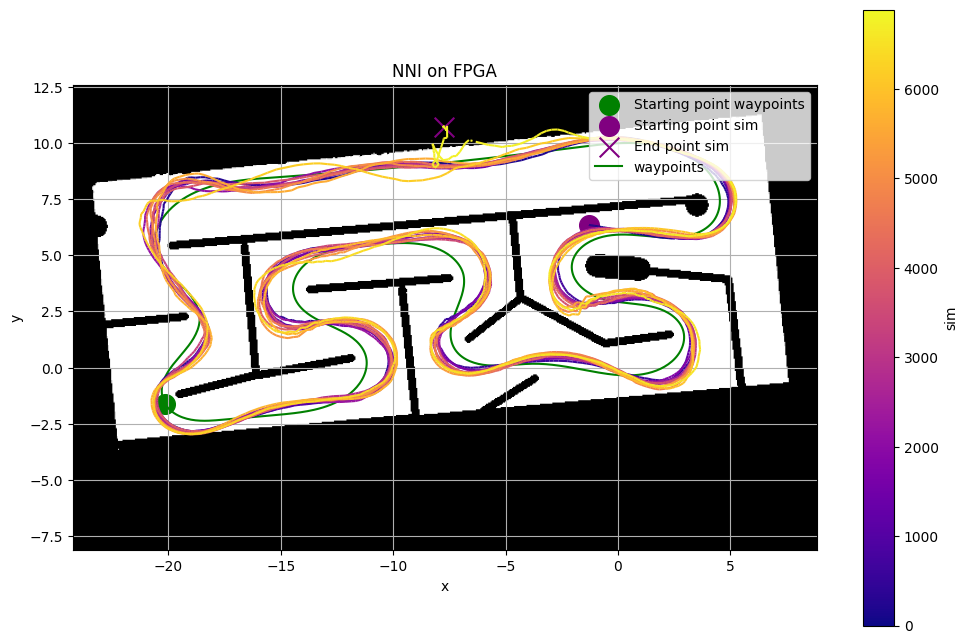

In [21]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import yaml

# NN
notebook_dir = os.getcwd()

def plot_experiment(experiment_name, df):
    
    map_name = "RCA2"
    experiment_path = "/Users/Florian/Documents/INI/F1TENTH/f1tenth_development_gym/AnalyseData/iros24/data/" + experiment_name
    
    
    # Load the data
    car_data = df
    
    map_path = os.path.join(experiment_path+"_data", "configs")
    
    wp_file = os.path.join(experiment_path+"_data","configs",map_name + '_wp.csv') 
    print(wp_file)   
    wp_data = pd.read_csv(wp_file, comment='#')
        
    car_x = car_data['pose_x'].to_numpy()
    car_y = car_data['pose_y'].to_numpy()
    
    wp_x = wp_data['x_m'].to_numpy()
    wp_y = wp_data['y_m'].to_numpy()


    img_path = os.path.join(map_path, map_name)
    with open(img_path + '.yaml', 'r') as file:
        map_data = yaml.safe_load(file)

    # Load the background image
    # print("Image path:", img_path+ '.png')
    img = plt.imread(img_path + '.png')
    # img = plt.imread('./utilities/maps/RCA1/RCA1_wp_min_curve_og.png')
    # Determine the limits based on the origin and resolution
    x_min = map_data['origin'][0]
    y_min = map_data['origin'][1]
    x_max = x_min + img.shape[1] * map_data['resolution']
    y_max = y_min + img.shape[0] * map_data['resolution']

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))

    # Show the image
    ax.imshow(img, extent=[x_min, x_max, y_min, y_max], cmap='gray')

    # Mark the starting point with a cross
    plt.scatter(wp_x[0], wp_y[0], color='green', marker='o', s=200, label='Starting point waypoints')
    plt.scatter(car_x[0], car_y[0], color='purple', marker='o', s=200, label='Starting point sim')
    
    # Mark the end point with a cross
    plt.scatter(car_x[-1], car_y[-1], color='purple', marker='x', s=200, label='End point sim')
    
    plt.plot(wp_x, wp_y, color='green', label='waypoints')
    # plt.plot(car_x, car_y, color='purple', linestyle='dashdot', label='sim')

    # Create a color map
    cmap1 = plt.get_cmap('plasma')
    cmap2 = plt.get_cmap('viridis')
    
    # Calculate the number of segments
    num_segments1 = len(car_x) - 1
    
    # Draw each segment individually
    for i in range(num_segments1):
        # Calculate the color value for this segment
        color = cmap1(i / num_segments1)

        # Draw the segment
        ax.plot(car_x[i:i+2], car_y[i:i+2], color=color, linestyle='dashdot')
        
    # Show the color bar
    sm = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=0, vmax=num_segments1))
    cbar1 = fig.colorbar(sm, ax=ax)
    cbar1.set_label('sim')
        

    
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    # plt.title(map_name + ' Coordinate System')
    title = "NNI on FPGA"
    # Settings.CONTROLLER

    plt.title(title)
    plt.legend(loc='upper right')

    
    # Save the plot as a PNG
    plt.savefig(os.path.join(map_path, 'plot.png'))


map_name = "RCA2"
experiment_name = "physical/F1TENTH__2024-02-19_18-35-58Recording1_RCA2_pp_50Hz_vel1.0_noise_c[0.0, 0.0]"

path= notebook_dir+'/data/' + experiment_name +'.csv'
print(path)

df_pp = pd.read_csv(path, comment='#')

plot_experiment(experiment_name, df_pp)
